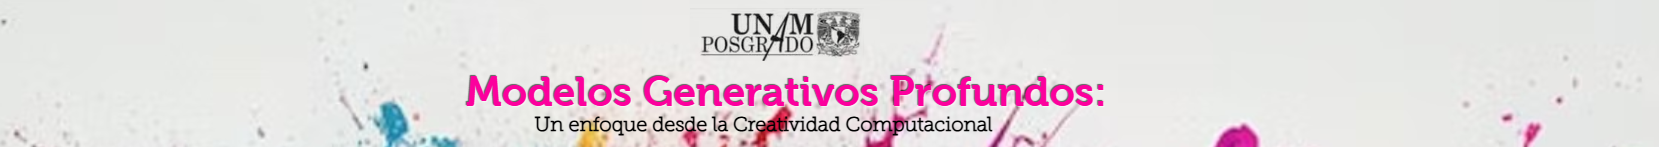

# CNN para clasificar imágenes de CIFAR10

In [2]:
import numpy as np

from tensorflow.keras import layers, models, optimizers, utils, datasets

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## 1. Preparar los datos <a name="prepare"></a>

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [4]:
NUM_CLASSES = 10
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

## 2. Contruir el modelo

In [5]:
input_layer = layers.Input((32, 32, 3))
x = layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, padding="same")(input_layer)
x = layers.ReLU()(x)
x = layers.Conv2D(filters=32, kernel_size=(3,3), strides=2, padding="same")(x)
x = layers.ReLU()(x)
x = layers.Conv2D(filters=64, kernel_size=(3,3), strides=1, padding="same")(x)
x = layers.ReLU()(x)
x = layers.Conv2D(filters=64, kernel_size=(3,3), strides=2, padding="same")(x)
x = layers.ReLU()(x)
x = layers.Flatten()(x)
x = layers.Dense(128)(x)
x = layers.ReLU()(x)
output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()

2025-09-17 12:17:21.879644: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-09-17 12:17:21.879676: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-09-17 12:17:21.879686: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.66 GB
I0000 00:00:1758133041.879697  221558 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1758133041.879720  221558 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

## 3. Compilar el modelo

In [6]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

## 4. Entrenar el modelo

In [7]:
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=25,
    shuffle=True,
    validation_data=(x_test, y_test),
)

Epoch 1/25


2025-09-17 12:17:22.950429: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.4575 - loss: 1.5143 - val_accuracy: 0.5368 - val_loss: 1.2976
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.5006 - loss: 1.5979 - val_accuracy: 0.4878 - val_loss: 1.9074
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.3877 - loss: 15.1593 - val_accuracy: 0.2879 - val_loss: 35.9514
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.2400 - loss: 618.4684 - val_accuracy: 0.1949 - val_loss: 5575.4653
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.1993 - loss: 195125.0625 - val_accuracy: 0.1976 - val_loss: 949759.0625
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.2003 - loss: 6509056.0000 - val_accuracy: 0.1925 - val_loss: 13974982.0000
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.1996 - loss: 44313084.0000 - val_accuracy: 0.2523 - val_loss: 52459004.0000
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2

## 5. Evaluar el modelo

In [8]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1507 - loss: 195457253376.0000


[195457253376.0, 0.15070000290870667]

In [9]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Podemos visualizar algunas de las imágenes junto con sus etiquetas y predicciones utilizando el siguiente código:

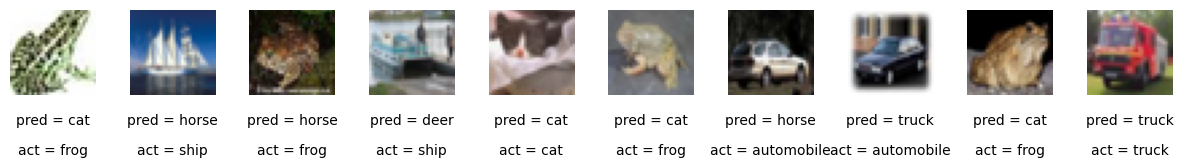

In [10]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)